In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [4]:
import seaborn as sns

<Axes: xlabel='sepal.length', ylabel='petal.length'>

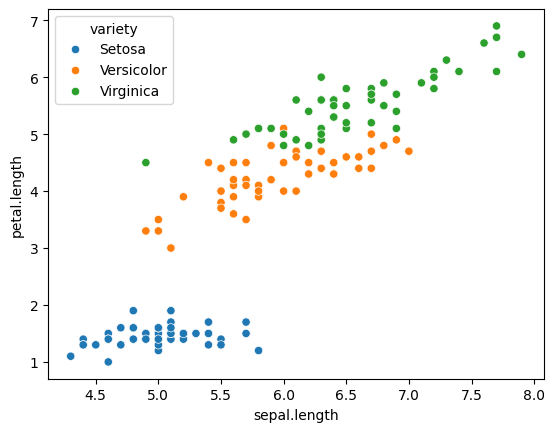

In [5]:
sns.scatterplot(data = df, x = "sepal.length", y = "petal.length", hue = 'variety')

<Axes: xlabel='sepal.length', ylabel='petal.width'>

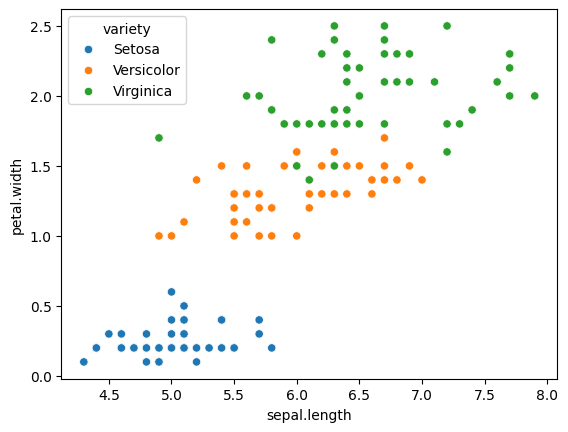

In [6]:
sns.scatterplot(data = df, x = "sepal.length", y = "petal.width", hue = 'variety')

In [7]:
variety_duimmies = pd.get_dummies(df["variety"], dtype = int)

In [8]:
variety_duimmies.head(2)

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0


### Codificación de variables

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
df["variety"] = label_encoder.fit_transform(df["variety"])

In [12]:
print(label_encoder.classes_)

['Setosa' 'Versicolor' 'Virginica']


In [13]:
X = df.drop(["variety"], axis = 1)
y = df["variety"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [19]:
score_train = {}
score_test = {}
for k in range(1, 21):
    knn_grid = KNeighborsClassifier(n_neighbors = k)
    knn_grid.fit(X_train, y_train)
    score_train[k] = knn_grid.score(X_train, y_train)
    score_test[k]= knn_grid.score(X_test, y_test)

In [20]:
import matplotlib.pyplot as plt

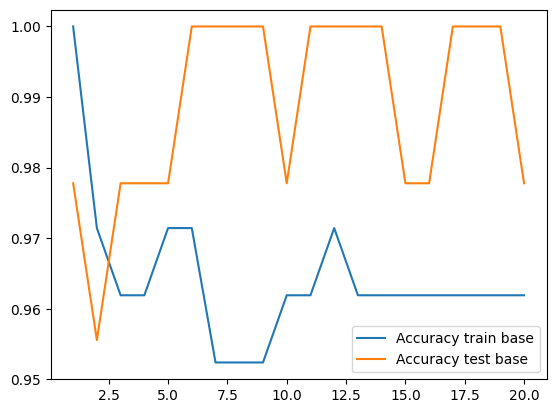

In [21]:
plt.plot(score_train.keys(), score_train.values(), label = 'Accuracy train base')
plt.plot(score_test.keys(), score_test.values(), label = 'Accuracy test base')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
y_pred = knn.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

